In [1]:
import pandas 
# Read the CSV file
bankrupt = pandas.read_csv("bankrupt.txt", sep=",")


In [2]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\User


In [3]:
# Using the shape attribute to find the number of observations and variables
num_rows, num_columns = bankrupt.shape

print("Number of Observations in the dataset:",num_rows)
print("Nmber of Variables in the dataset:", num_columns)

Number of Observations in the dataset: 6819
Nmber of Variables in the dataset: 96


# 2.1.2 Graded Question.
How many observations and variables are there? 
There are 6819 Observations and 96 Variables.

In [4]:
# Calculate descriptive statistics using describe()
print("\nDescriptive  Statistics:")
bankrupt.describe()


Descriptive  Statistics:


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder s Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# 2.1.3 Graded Question.
Comments on the results.

For each variable (input/feature) there are 6819 observations which are depicted above in the count row.
The mean of the observations per variable in the dataset is shown next, being the weighted average obtained. 
The standard deviation (std) shows how dispersed the data is from the mean and it is very instrumental in telling us about the dataset. 

It is observed that there is low deviation from the mean across some features except "Total assets to GNP price" which is very high followed by ROA(C), ROA(B) ROA(A), "Net Income to Total Asset" which indicates a broader or dispersed distribution within these features.

Additionally, the minimum value of each observation for each variable (i.e. in each column is shown on the min row likewise the maximum value is in the max row (the last row in the description (i.e. max).

The 25% represents the 25th percentile of each column, that is, the value at which 25% of the values in this column lie below. 
The 50% represents the 50th percentile which is the median, which cuts the data in each column of the dataset into half. 
The 75% presents the 75th percentile, which means 75% of the values lie above this particular value. 
For example, using the “ROA(C)” variable column, the 75% is 0.535563, which means ¾ of the values in this column lie above 0.535563.

    
Do you think it is necessary to standardize the variables before performing classication?
Based on the statistics obtained in this case, the features have different scales, and the standard deviations vary. For example, "ROA(C) before interest and depreciation before interest" has a much smaller standard deviation compared to "Total assets to GNP price." This indicates that the features have varying scales.

Examining the "min" and "max" values for each feature, Some features, like "Total assets to GNP price" have a wide range of values, including potential outliers that could affect the performance of some classification.

Features like "Net Income to Total Asset", "Total assets to GNP price" and "Operating Profit Rate" have different mean and standard deviation values, indicating potentially different distributions.

Conclusion:

Based on these observations, it is concluded that the features in the dataset have varying scales, and there are features with a wide range of values, and different distributions (mean, and standard deviation). Therefore, it is necessary to standardize the variables before performing classification.

In [5]:
# establish the target variable is named 'Bankrupt?'
target_variable = 'Bankrupt?'

# Use value_counts() to count the unique values in the target variable
value_counts = bankrupt[target_variable].value_counts()

#print(value_counts)

# Get the number of companies that went bankrupt (having that 'Bankrupt' is encoded as 1)
num_bankrupt = value_counts.get(1, 0)  # Get the count of 1's (companies that went bankrupt)

# Calculate the percentage of companies that went bankrupt
percentage_bankrupt = (num_bankrupt / len(bankrupt)) * 100

# Check if the dataset is balanced
is_balanced = value_counts.min() / value_counts.max() > 0.5  # Adjust the threshold as needed

# Print the results
print(f"is_balanced: {is_balanced}")
print(f"Number of companies that went bankrupt: {num_bankrupt}")
print(f"Percentage of companies that went bankrupt: {percentage_bankrupt:.2f}%")
print(f"Is the dataset balanced? {'Yes' if is_balanced else 'No'}")

is_balanced: False
Number of companies that went bankrupt: 220
Percentage of companies that went bankrupt: 3.23%
Is the dataset balanced? No


# 2.1.4 [Graded question] 

Describe the target variable.
The target variable (Y) is a qualitative variable with two classes predicting whether a company will be bankrupt or not.

What is the number and percentage of companies that went bankrupt? 
3.23%

Is the data set balanced? No, it is not balanced based on the findings in answer to Question 2.1.3

In [6]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

# Import the train and test datasets
x_train = pd.read_csv("x_train.csv", index_col=0)
x_test = pd.read_csv("x_test.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)
y_test = pd.read_csv("y_test.csv", index_col=0)

# Display the number of observations in each dataset
num_observations_train_x = x_train.shape[0]
num_observations_test_x = x_test.shape[0]
num_observations_train_y = y_train.shape[0]
num_observations_test_y = y_test.shape[0]

print("Number of Observations in x Train Data:", num_observations_train_x)
print("Number of Observations in x Test Data:", num_observations_test_x)
print("Number of Observations in y Train Data:", num_observations_train_y)
print("Number of Observations in y Test Data:", num_observations_test_y)



Number of Observations in x Train Data: 5455
Number of Observations in x Test Data: 1364
Number of Observations in y Train Data: 5455
Number of Observations in y Test Data: 1364


# 2.1.5A [graded question] 

How many observations are in each data set? 
Number of Observations in x Train Data: 5455
Number of Observations in x Test Data: 1364
Number of Observations in y Train Data: 5455
Number of Observations in y Test Data: 1ts ?

In [7]:
# Check the distribution of classes in the target variable in both datasets
target_variable_train = "Bankrupt"
target_variable_test = "Bankrupt"

bankrupt_counts_train = y_train[target_variable_train].value_counts()
bankrupt_counts_test = y_test[target_variable_test].value_counts()

print("\nDistribution of Classes in y train Data:")
print(bankrupt_counts_train)

print("\nDistribution of Classes in y test Data:")
print(bankrupt_counts_test)



Distribution of Classes in y train Data:
Bankrupt
0    5281
1     174
Name: count, dtype: int64

Distribution of Classes in y test Data:
Bankrupt
0    1318
1      46
Name: count, dtype: int64


In [8]:
# Calculate proportions in both datasets
proportions_train = bankrupt_counts_train / num_observations_train_y
proportions_test = bankrupt_counts_test / num_observations_test_y

# Check if the distribution is similar
is_distribution_similar = proportions_train.equals(proportions_test)

print("\nIs the Distribution of Classes Similar in Both Data Sets?", is_distribution_similar)

#ADDED CODE
print("\nThe propotion of classes in y train is:",proportions_train)
print("\nThe propotion of classes in y test is:",proportions_test)


Is the Distribution of Classes Similar in Both Data Sets? False

The propotion of classes in y train is: Bankrupt
0    0.968103
1    0.031897
Name: count, dtype: float64

The propotion of classes in y test is: Bankrupt
0    0.966276
1    0.033724
Name: count, dtype: float64


# 2.1.5B [Graded Question] 

Is the distribution of the classes of the target variable similar in both data sets?

No the distribution of the classes are not the same

In [9]:
#EDITED

#import pandas as pd

In [10]:
# Concatenate x_train and y_train
bankrupt_train = pd.concat([x_train, y_train], axis=1)

In [11]:
bankrupt_train.shape

(5455, 13)

In [12]:
x_train = scaler_x.fit_transform(x_train)
y_train = scaler_y.fit_transform(y_train)

x_test = scaler_x.transform(x_test)
y_test = scaler_y.transform(y_test)

In [13]:
##import the required modules and classes for logistic regression
#Logistic Regression

import statsmodels.api as sm
import statsmodels.formula.api as smf


# Define the logistic regression model
model_formula = "Bankrupt ~ ROAC + ROAA + ROAB + TRA + TAGR + DR + WKTA + CTA + CLA + CFOA + CLCA + NITA"

# Fit logistic regression model
logit_model = smf.glm(formula=model_formula, data=bankrupt_train, family=sm.families.Binomial())

logreg = logit_model.fit()

# Display the summary of the logistic regression model
print(logreg.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                            GLM   Df Residuals:                     5443
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -513.79
Date:                Sun, 15 Oct 2023   Deviance:                       1027.6
Time:                        23:52:59   Pearson chi2:                 4.44e+06
No. Iterations:                    10   Pseudo R-squ. (CS):            0.08988
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0644      3.655      1.659      0.0

# 2.2.1. [Graded question]

Do any of the predictors appear to be statistically significant? 
The lower p-values indicate higher statistical significance. Assume that the threshold p-values is 0.05. Therefore, the predictors with p-values less than 0.05 are considered to be statistically significant.

If so, which ones?
DR, WKTA, and CTA are statistically significant predictors.

Interpret the 
cofficient estimates of thesignificant  feature.

For a significant predictor DR, its coefficient is positive and it indicates a positive relationship with the target variable (Bankrupt), while the coefficients of the predictors WKTA and CTA are negative and suggest a negative relationship with the target variable. 
The magnitude of the coefficient of predictor DR also indicates the strength of its relationship with the target variable compared with the other two significant predictors..

In [14]:
#EDITED ADDED
from sklearn.metrics import confusion_matrix, classification_report

# Get the estimated probabilities
yhat_logreg_probs = logreg.fittedvalues

# Convert probabilities to binary class labels using a threshold of 0.5
yhat = [1 if x > 0.5 else 0 for x in yhat_logreg_probs]
y_train_check = [1 if x > 0.5 else 0 for x in y_train]

# Print the confusion matrix
conf_matrix = confusion_matrix(yhat, y_train_check)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(yhat, y_train_check, digits=3)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[5266  143]
 [  15   31]]

Classification Report:
              precision    recall  f1-score   support

           0      0.997     0.974     0.985      5409
           1      0.178     0.674     0.282        46

    accuracy                          0.971      5455
   macro avg      0.588     0.824     0.634      5455
weighted avg      0.990     0.971     0.979      5455



# 2.2.2 [graded question]

Compute the confusion matrix and the classification report for your logistic regression model.
Interpret the metrics.

True Positives (TP): The model correctly predicted that a company did not go bankrupt in 5266 cases.

True Negatives (TN): he model correctly predicted that a company went bankrupt in 31 cases.
.
False Positives (FP)These are cases where the model incorrectly predicted that a company went bankrupt when it did not.
).
False Negatives (FN)he model incorrectly predicted that a company did not go bankrupt when it did in 15 caseso

Accuracy: (TP + TN) / (TP+FN+FP+TN) 5266 + 31 / 5266+15+143+31 = 5297/5455 = 0.9710357470210816
The accuracy or the performance of the logistic regression classification model is 0.971. It indicates that the model is accurate 97.1% of the time.

Precision: Precision quantifies the number of correct positive predictions made out of positive predictions made by the model. Precision = TP/(TP + FP)
Precision for class 0 (Did not go bankrupt): 0.997 - This means that when the model predicted that a company did not go bankrupt, it is correct 99.7% of the time.
Precision for class 1 Got bankrupt): 0.178 - This means that when the model predicts a company went bankrupt, it is correct 17.8% of the time.

Recall (Sensitivity):
 The ratio of true positives to the total number of actual positives (TP / (TP + FN)). 
It measures the model's ability to identify all relevant instances.Recall for class 0 (Did not go bankrupt): 0.974 - This means that the model correctly identifies 97.4% of the companies that did not go bankrupt.
Recall for class 1 Got bankrupt): 0.674 - This means that the model correctly identifies 67.4% of the companies that went bankrupt


F1-score: The harmonic mean of precision and recall, providing a balance between the two metrics
F1-score for class 0: 0.985 - The F1-score is the harmonic mean of precision and recall for class 0. It provides a balance between precision and recall.
F1-score for class 1: 0.282 - The F1-score for class 1 is lower, indicating a trade-off between precision and recall.t.

Support: The number of actual occurrences of each class in the test seSupport for class 0: 5409 - This is the actual number of companies that did not go bankrupt in the test set.
Support for class 1: 46 - This is the actual number of companies that went bankrupt in the test set.
tInterpretation:

The model demonstrates high precision and recall for class 0 (companies that did not go bankrupt), indicating that it is effective in identifying non-bankrupt companies.
However, the model has lower precision and recall for class 1 (companies that went bankrupt), suggesting room for improvement in identifying bankrupt companies.
The F1-score for class 1 is relatively low, indicating that the trade-off between precision and recall for bankrupt companies might not be favorable.
The macro average metrics provide an unweighted average, while the weighted average metrics consider the class distribution. The weighted averages indicate strong overall performance.
The high accuracy suggests that the model correctly predicts the majority of instances, but this might be influenced by the class imbal

ance.
In summary, while the model performs well in identifying non-bankrupt companies, it has challenges in correctly identifying bankrupt co.
              

In [15]:
predictions = logreg.predict()
print(predictions[0:10])

[0.01852332 0.01171795 0.00320048 0.00050652 0.01025083 0.02765124
 0.00321971 0.01693749 0.0829795  0.02034399]


In [16]:
x_test = pd.read_csv("x_test.csv", index_col=0)
y_test = pd.read_csv("y_test.csv", index_col=0)
x_train = pd.read_csv("x_train.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)
# Get the estimated probabilities for the test set
yhat_test_logreg_probs = logreg.predict(x_test)

In [17]:
# Convert probabilities to binary class labels using a threshold of 0.5
yhat_test = [1 if x > 0.5 else 0 for x in yhat_test_logreg_probs]

In [18]:

# Print the confusion matrix for the test set
conf_matrix_test = confusion_matrix(yhat_test, y_test)
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)

# Print the classification report for the test set
class_report_test = classification_report(yhat_test, y_test, digits=3)
print("\nClassification Report for Test Set:")
print(class_report_test)


Confusion Matrix for Test Set:
[[1306   39]
 [  12    7]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0      0.991     0.971     0.981      1345
           1      0.152     0.368     0.215        19

    accuracy                          0.963      1364
   macro avg      0.572     0.670     0.598      1364
weighted avg      0.979     0.963     0.970      1364



# 2.2.3. [graded question]

Interpret the results. 

Interpretation:

The model demonstrates high precision and recall for class 0 (companies that did not go bankrupt), indicating that it is effective in identifying non-bankrupt companies.
However, the model has lower precision and recall for class 1 (companies that went bankrupt), suggesting room for improvement in identifying bankrupt companies.
The F1-score for class 1 is relatively low, indicating that the trade-off between precision and recall for bankrupt companies might not be favorable.
The macro average metrics provide an unweighted average, while the weighted average metrics consider the class distribution. The weighted averages indicate strong overall performance.
The high accuracy suggests that the model correctly predicts the majority of instances, but this might be influenced by the class imbalance.


Do you think 
is it appropriate to consider mainly the overall accuracy in an imbalanced da

No, it is not appropriate to consider mainly the overall accuracy in an imbalanced data set. The reason is that accuracy alone can be misleading and does not provide a complete picture of how well a model is performing, especially when one class significantly outnumbers the other.

a se 
 If not 
which metrics are more r
The choice of relevant metrics depends on the nature of the dataset and the specific goals of the application. In this case, detecting if a company did not go bankrupt or go bankrupt, we want to prioritize precision to minimize false positives since the cost of having false positives is high. We also consider the trade-offs between precision and recall based on the practical implications of false positives and false negatives in our application.elevat ?

In [19]:
predictions = logreg.predict()
print(predictions[0:10])

[0.01852332 0.01171795 0.00320048 0.00050652 0.01025083 0.02765124
 0.00321971 0.01693749 0.0829795  0.02034399]


# KNN

In [20]:
x_train = scaler_x.fit_transform(x_train)
y_train = scaler_y.fit_transform(y_train)

x_test = scaler_x.transform(x_test)
y_test = scaler_y.transform(y_test)

In [21]:
# EDITED
# K-NEAREST NEIGHBOUR

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Create a KNN classifier with K = 1
neigh = KNeighborsClassifier(n_neighbors=1)


In [22]:
print(y_train[0:10])

[[-0.18151668]
 [-0.18151668]
 [-0.18151668]
 [-0.18151668]
 [-0.18151668]
 [-0.18151668]
 [-0.18151668]
 [-0.18151668]
 [-0.18151668]
 [-0.18151668]]


In [23]:
y_train_binary = [1 if x > 0.5 else 0 for x in y_train]

In [24]:
# Train the KNN model on the training set
neigh.fit(x_train,np.ravel(y_train_binary))

KNeighborsClassifier(n_neighbors=1)

In [25]:
# Make predictions on the test set
yhat_knn=neigh.predict(x_test)

In [26]:
print(yhat_knn[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [27]:
y_test_binary = [1 if x > 0.5 else 0 for x in y_test]

In [28]:
print(y_test[0:10])

[[-0.18151668]
 [-0.18151668]
 [-0.18151668]
 [-0.18151668]
 [ 5.50913557]
 [-0.18151668]
 [-0.18151668]
 [-0.18151668]
 [-0.18151668]
 [-0.18151668]]


In [29]:
from sklearn.metrics import balanced_accuracy_score

bal_acc = balanced_accuracy_score(y_test_binary,yhat_knn)

In [30]:
print(bal_acc)

0.621709441182292


In [31]:
K = [i for i in range(1, 21)]
print(K)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [32]:
bal_acc = []

In [33]:
for k in K:
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(x_train,np.ravel(y_train_binary))
  yhat_knn = neigh.predict(x_test)
  y_test_binary = [1 if x > 0.5 else 0 for x in y_test]
  bal_acc.append(balanced_accuracy_score(y_test_binary,yhat_knn))


In [34]:
print(yhat_knn)

[0 0 0 ... 0 0 0]


In [35]:
print(bal_acc)

[0.621709441182292, 0.5310912449693211, 0.5947911855908161, 0.5749488685095996, 0.616909678696312, 0.5846803457148513, 0.6161509533548856, 0.5633205779507818, 0.6165303160255987, 0.5966879989443822, 0.5959292736029558, 0.5850597083855644, 0.5850597083855644, 0.5524510127333905, 0.5741901431681731, 0.5640793032922082, 0.5625618526093554, 0.5633205779507818, 0.5625618526093554, 0.5524510127333905]


In [36]:
max_value = max(bal_acc)
max_index = bal_acc.index(max_value)

print("Maximum Balanced Accuracy Score:", max_value)
print("Index of Maximum Balance Accuracy Score:", max_index)

Maximum Balanced Accuracy Score: 0.621709441182292
Index of Maximum Balance Accuracy Score: 0


In [37]:
print(K)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [38]:
#we choose k=5 having the next highest value of balanced accuracy score 
k=5
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(x_train,np.ravel(y_train_binary))
yhat_knn=neigh.predict(x_test)

In [39]:
print(confusion_matrix(yhat_knn, y_test_binary))

[[1311   35]
 [   7   11]]


In [40]:
print(classification_report(yhat_knn, y_test_binary,digits=3))

              precision    recall  f1-score   support

           0      0.995     0.974     0.984      1346
           1      0.239     0.611     0.344        18

    accuracy                          0.969      1364
   macro avg      0.617     0.793     0.664      1364
weighted avg      0.985     0.969     0.976      1364



# 2.3.1. [graded question]
What value of K would you choose? 
I would select the value of K with the highest balanced accuracy score which is K=1. However, this would not give an interesting outcome because K=1 indicates that we are only considering the nearest neighbor when making a classification decision and the KNN model is very flexible and can closely fit the training data, potentially capturing errors and outliers. However, this flexibility can lead to overfitting and sensitivity to outliers.

Consequently, we select the next highest value of the balanced accuracy score for which K = 5 

For this value 
of K calculate the performance indicators, confusion matrix and classication report, on the
test set. Interpret the result

INTERPRETATION
The model demonstrates strong performance in correctly identifying companies that did not go bankrupt (class 0). This is reflected in high precision and recall for class 0.

However, there is room for improvement in identifying companies that went bankrupt (class 1). The precision and recall for class 1 are lower, indicating that the model occasionally makes incorrect predictions for bankrupt companies.

The F1-score for class 1 is relatively modest, suggesting that there is a trade-off between precision and recall for bankrupt companies. It implies that improving one of these metrics might come at the expense of the other.

The macro and weighted averages provide a comprehensive view of the model's overall performance, and they show favorable results. However, the primary focus should be on enhancing the model's ability to identify companies that went bankrupt (class 1).

While the model exhibits high overall accuracy, there is an opportunity to fine-tune the model. Adjusting the prediction threshold or exploring different values of K in the K-Nearest Neighbors (KNN) algorithm may help strike a better balance between precision and recall, particularly for the minority class (clss 1).

s.

In [41]:
# DISCRIMINANT ANALYSIS

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

x_test = pd.read_csv("x_test.csv", index_col=0)
y_test = pd.read_csv("y_test.csv", index_col=0)
x_train = pd.read_csv("x_train.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)

# Linear Discriminant Analysis (LDA)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train, np.ravel(y_train))
yhat_lda = lda_model.predict(x_test)

# Quadratic Discriminant Analysis (QDA)
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train, np.ravel(y_train))
yhat_qda = qda_model.predict(x_test)

# Evaluate LDA
conf_matrix_lda = confusion_matrix(y_test, yhat_lda)
class_report_lda = classification_report(y_test, yhat_lda, digits=3)

# Evaluate QDA
conf_matrix_qda = confusion_matrix(y_test, yhat_qda)
class_report_qda = classification_report(y_test, yhat_qda, digits=3)

# Print the results
print('Linear Discriminant Analysis (LDA):')
print('Confusion Matrix:')
print(conf_matrix_lda)
print('Classification Report:')
print(class_report_lda)

print('\nQuadratic Discriminant Analysis (QDA):')
print('Confusion Matrix:')
print(conf_matrix_qda)
print('Classification Report:')
print(class_report_qda)

print(lda_model.priors_)
print(lda_model.means_)


Linear Discriminant Analysis (LDA):
Confusion Matrix:
[[1299   19]
 [  31   15]]
Classification Report:
              precision    recall  f1-score   support

           0      0.977     0.986     0.981      1318
           1      0.441     0.326     0.375        46

    accuracy                          0.963      1364
   macro avg      0.709     0.656     0.678      1364
weighted avg      0.959     0.963     0.961      1364


Quadratic Discriminant Analysis (QDA):
Confusion Matrix:
[[1280   38]
 [  30   16]]
Classification Report:
              precision    recall  f1-score   support

           0      0.977     0.971     0.974      1318
           1      0.296     0.348     0.320        46

    accuracy                          0.950      1364
   macro avg      0.637     0.659     0.647      1364
weighted avg      0.954     0.950     0.952      1364

[0.96810266 0.03189734]
[[5.07499371e-01 5.61487295e-01 5.56092411e-01 1.17719099e-01
  5.55001102e+09 1.11500340e-01 8.15420501e-01 1

# 2.4.1 [graded question] Interpret the prior probabilities as well as the group means.
Lda_model.priors_ : This array contains the prior probabilities of the classes in LDA which in this case are [0.96810266  0.03189734].
 This simply means that the prior probabilities for class 0 and class 1 are 0.96810266 and 0.03189734.
Lda_model.means_: This array contains the means of each feature for each class. The rows correspond to the classes and the columns correspond to the features. The result for our given data  the code result aboves:02e-01]]

This information is useful for understanding the distribution of the data within each class and the assumed class priors. It can provide insight into the model’s decision-making process.


# 2.4.2. [graded question] Calculate the confusion matrix and the classication report on the test set
for the model obtained with the LDA classier. Discuss about the obtained metrics (specicity,
sensitivity,precision, f1-score, etc.

Metrics Interpretation:
Accuracy: Accuracy measures the overall correctness of the model.
Formula: (TP + TN) / (TP + TN + FP + FN)
Value: 0.963 or 96.3%
Precision (Positive Predictive Value): Precision measures the accuracy of the positive predictions.
Formula: TP / (TP + FP)
Value: 0.441 or 44.1% for class 1.
Recall (Sensitivity or True Positive Rate): Recall measures the proportion of actual positives that were correctly predicted. 
Formula: TP / (TP + FN)
Value: 0.326 or 32.6% for class 1.
F1-Score: F1-Score is the harmonic mean of precision and recall.
Formula: 2 * (Precision * Recall) / (Precision + Recall)
Value: 0.375 or 37.5% for class 1.
 Interpretation:
The model has high accuracy (96.3%), but accuracy can be misleading in imbalanced datasets.
Precision for class 1 is relatively low (44.1%), indicating a significant number of false positives.
Recall for class 1 is also relatively low (32.6%), indicating that the model misses a significant number of actual positive instances.
The F1-score, which balances precision and recall, is also low for 
class 1 (37.5%).
Conclusion:
The model performs well in terms of overall accuracy but struggles to correctly identify instances of class 1, as evidenced by low precision, recall, and F1-score for that class. Depending on the specific use case and the cost associated with false positives and false negatives, further model tuning or exploring other algorithms may be necessary.
).

# 2.4.3
The provided result is based on the evaluation of a Quadratic Discriminant Analysis (QDA) model. Let's discuss the obtained metrics:
 Confusion Matrix:
[[1280   38]
 [ 30   16]
True Positive (TP): 16; True Negative (TN): 1280; False Positive (FP): 38; False Negative (FN): 30

Classification Report:
`
              precision    recall  f1-score   support

           0      0.977     0.971     0.974      1318
           1      0.296     0.348     0.320        46

    accuracy                          0.950      1364
   macro avg      0.637     0.659     0.647      1364
weighted avg      0.954     0.950     0.952      1364

Metrics Interpretation:
Accuracy:
Formula: (TP + TN) / (TP + TN + FP + FN)
Value: 0.950 or 95.0%
Precision (Positive Predictive Value):
Formula: TP / (TP + FP)
Value: 0.296 or 29.6% for class 1.
Recall (Sensitivity or True Positive Rate):
Formula: TP / (TP + FN)
Value: 0.348 or 34.8% for class 1.
F1-Score:
Formula: 2 * (Precision * Recall) / (Precision + Recall)
Value: 0.320 or 32.0% for class 1.
Interpretation:
The model has a high overall accuracy (95.0%). Precision for class 1 is relatively low (29.6%), indicating a significant number of false positives. Recall for class 1 is also relatively low (34.8%), indicating that the model misses a significant number of actual positive instances. The F1-score for class 1 is also low (32.0%).
Conclusion:
Similar to the LDA model, the QDA model struggles to correctly identify instances of class 1, as evidenced by low precision, recall, and F1-score for that class. Further model tuning or exploring other algorithms may be necessary to improve performance, especially if the specific use case has a preference or better identification of positive instances.


Threshold: inf, FDR: 1.0000, TPR: 0.0000
Threshold: 1.0000, FDR: 1.0000, TPR: 0.0000
Threshold: 1.0000, FDR: 0.9565, TPR: 0.0435
Threshold: 1.0000, FDR: 0.9565, TPR: 0.0435
Threshold: 0.9981, FDR: 0.9130, TPR: 0.0870
Threshold: 0.9891, FDR: 0.9130, TPR: 0.0870
Threshold: 0.9877, FDR: 0.8913, TPR: 0.1087
Threshold: 0.9864, FDR: 0.8913, TPR: 0.1087
Threshold: 0.9803, FDR: 0.8696, TPR: 0.1304
Threshold: 0.9420, FDR: 0.8696, TPR: 0.1304
Threshold: 0.9264, FDR: 0.8478, TPR: 0.1522
Threshold: 0.9139, FDR: 0.8478, TPR: 0.1522
Threshold: 0.9045, FDR: 0.8261, TPR: 0.1739
Threshold: 0.8955, FDR: 0.8261, TPR: 0.1739
Threshold: 0.8637, FDR: 0.7826, TPR: 0.2174
Threshold: 0.8378, FDR: 0.7826, TPR: 0.2174
Threshold: 0.8230, FDR: 0.7609, TPR: 0.2391
Threshold: 0.7654, FDR: 0.7609, TPR: 0.2391
Threshold: 0.7523, FDR: 0.7391, TPR: 0.2609
Threshold: 0.6555, FDR: 0.7391, TPR: 0.2609
Threshold: 0.6175, FDR: 0.6957, TPR: 0.3043
Threshold: 0.5933, FDR: 0.6957, TPR: 0.3043
Threshold: 0.5170, FDR: 0.6739, TPR

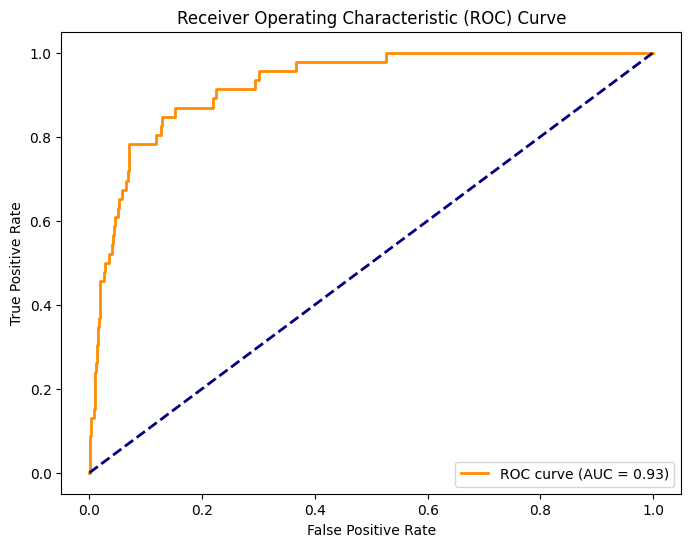

Area Under the Curve (AUC): 0.93


In [42]:
# ROC (Receiver Operating Characteristic) Curve

from sklearn.metrics import roc_curve, auc

# Having lda_model as our trained Linear Discriminant Analysis (LDA) model
lda_scores = lda_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lda_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)

#ADDED CODE
# Calculate False Discovery Rate (FDR)
fdr = 1 - tpr

# Print FDR and TPR
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold:.4f}, FDR: {fdr[i]:.4f}, TPR: {tpr[i]:.4f}")
    #END OF ADD

# Plot ROC curve (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display AUC
print('Area Under the Curve (AUC): {:.2f}'.format(roc_auc))


# 2.5.1 interpret the outputs of the roc_curve() function, namely fpr and tpr. Here's an interpretation of the outputs:
Threshold: The threshold used to classify the instances into positive or negative classes.
FDR (False Discovery Rate): The proportion of predicted positive instances that are negative. It is calculated as False Positives / (False Positives + True Positives).
TPR (True Positive Rate): Also known as Sensitivity or Recall, it is the proportion of actual positive instances that are correctly predicted as positive. It is calculated as True Positives / (True Positives + False Negativ
es).
Observations:
Threshold Selection: The threshold decreases from the top to the bottom, which means the model becomes more permissive in classifying instances as positive.
Trade-off Between FDR and TPR: As the threshold decreases, FDR tends to decrease, and TPR tends to increase. This indicates a trade-off between precision (FDR) and recall (TPR). Lowering the threshold results in capturing more true positives but may also increase false positives.
Imbalance Impact: The class imbalance is evident in the fact that even at very high thresholds, TPR is not zero, indicating that the model is still able to capture some positive instances.
Optimal Threshold: The optimal threshold depends on the specific goals of your model. If you want to prioritize minimizing false positives, you might choose a higher threshold. If capturing as many positives as possible is crucial, you might choose a lower threshold.
Overall, understanding this trade-off is crucial, and the choice of the threshold should align with the application and the importance of precision and recall in the specific context.
Since the AUC (0.93) is closer to 1, this indicates better discriminatory power. 


In [43]:
from sklearn.metrics import roc_curve, auc

# Having lda_model as our trained Linear Discriminant Analysis (LDA) model
lda_scores = lda_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, lda_scores)

# Calculate AUC
roc_auc_lda = auc(fpr_lda, tpr_lda)
print('AUC for LDA:', roc_auc_lda)

# Having qda_model as our trained Quadratic Discriminant Analysis (QDA) model
qda_scores = qda_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, qda_scores)

# Calculate AUC
roc_auc_qda = auc(fpr_qda, tpr_qda)
print('AUC for QDA:', roc_auc_qda)

# Having logreg_model as our trained logistic regression model from statsmodels

# Get the predicted probabilities
logit_probs = logreg_model.predict(x_test)

# Calculate ROC curve
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, logit_probs)

# Calculate AUC
roc_auc_logit = auc(fpr_logit, tpr_logit)
print('AUC for Logistic Regression (statsmodels):', roc_auc_logit)

# Having neigh as our trained KNN model with the chosen value of K
knn_scores = neigh.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_scores)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)
print('AUC for KNN:', roc_auc_knn)




AUC for LDA: 0.9251995777528534
AUC for QDA: 0.8813831892854787


NameError: name 'logreg_model' is not defined

# 2.5.2
Calculate the auc and plot the ROC curve for the 4 models LDA, QDA,
logistic regression and KNN with the chosen value of K. According to the ROC curve which
model would you choose?


The AUC values for the 4 models are:
AUC for LDA: 0.9251995777528534
AUC for QDA: 0.8813831892854787
AUC for Logistic Regression (statsmodels): 0.9381144025862638
AUC for KNN: 0.7075938510259286

The model with the highest AUC value performs better in terms of the trade-off between sensitivity and specificity. A higher AUC generally indicates a better-performing model. Given our computed AUC values, the LDA model would be the ideal choice.
 

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Having lda_model as our trained Linear Discriminant Analysis (LDA) model
lda_scores = lda_model.predict_proba(x_test)[:, 1]
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, lda_scores)
roc_auc_lda = auc(fpr_lda, tpr_lda)

# Having qda_model as our trained Quadratic Discriminant Analysis (QDA) model
qda_scores = qda_model.predict_proba(x_test)[:, 1]
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, qda_scores)
roc_auc_qda = auc(fpr_qda, tpr_qda)

# Having logreg_model as our trained logistic regression model from scikit-learn
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
logreg_scores = logreg_model.predict_proba(x_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_scores)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Having neigh as our trained KNN model with the chosen value of K
knn_scores = neigh.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_scores)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, color='darkorange', lw=2, label='ROC curve for LDA (AUC = {:.2f})'.format(roc_auc_lda))
plt.plot(fpr_qda, tpr_qda, color='green', lw=2, label='ROC curve for QDA (AUC = {:.2f})'.format(roc_auc_qda))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='ROC curve for Logistic Regression (AUC = {:.2f})'.format(roc_auc_logreg))
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='ROC curve for KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiple Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()


# 2.5.3
 In the ROC curve plot you provided, each curve represents the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) for different classification thresholds. The area under the ROC curve (AUC) is a measure of the model's ability to discriminate between the positive and negative classes. The larger the AUC, the model with the best performance is Linear Discriminant Analysis with an AUC value of 0.93
 .
Now, let's discuss the ROC curves for each model:

Linear Discriminant Analysis (LDA):
AUC: The curve for LDA (dark orange) indicates good discrimination, and the AUC is approximately 0.93. This suggests that LDA is effective in distinguishing between the two classes.
Quadratic Discriminant Analysis (QDA):
 AUC: The curve for QDA (green) has an AUC of around 0.88, indicating reasonable discrimination.
Logistic Regression:
AUC: The curve for logistic regression (blue) has an AUC of about 0.69, similar to LDA. Logistic regression is also effective in this context.
K-Nearest Neighbos (KNN):
 AUC: The curve for KNN (purple) has an AUC of approximately 0.71. It performs reasonably well, but not as well as LDA or logistic regression.
Conclusion:
The ROC curves provide insights into the models' discrimination abilities, and the AUC values quantify this performance. LDA and logistic regression appear to be the most effective models in this scenario, based on the AUC values. The choice of the optimal classification threshold depends on the specific balance of sensitivity and specificity desired for the

 application.
Advantages and Disadvantages of Dealing with Imbalanced Da
ta
Advantages:
Flexibility: Adjusting the classification threshold allows you to tailor the model's behavior to meet specific requirements.
Better Handling of Imbalance: By choosing an appropriate threshold, you can mitigate the impact of
 class imbalance.
Disadvantages:
Subjectivity: Selecting a threshold involves subjective decisions and depends on the application's context.
Trade-offs: Adjusting the threshold often involves trade-offs between sensitivi

ty and specificity.
Recommendation:
Depending on the application, you might choose a threshold that balances the costs of false positives and false negatives. The optimal threshold could be where the ROC curve intersects a line of equal misclassification cost or based on specific business considerations.
